# Example Notebook for TAFT
## Time alignment for tiles 

In [1]:
%cd ..

/home/maximilian/Github/melp


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from melp import Detector
import melp.taft

Welcome to JupyROOT 6.24/06


## Creating/Loading detector with misalignment

In [4]:
#mu3e_detector = Detector.initFromROOT("./run42_20000.root")
mu3e_detector = Detector.initFromSave("test2.det")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [5]:
melp.taft.select(mu3e_detector)

In [7]:
options={
    "ttree_loc": "alignment/mu3e",
}

hist, hist_2, hist_3 = melp.taft.find_cosmic_events("../../Downloads/mu3e_sorted_000002_cosmic.root",**options)

100 % | Total Frames:  4999840
Frames with hits:  3820323


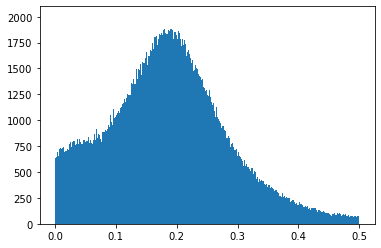

In [9]:
plt.hist(hist, bins=1000, range=(0,0.5))
plt.ylim(ymax = 2100, ymin = 0)
plt.show()

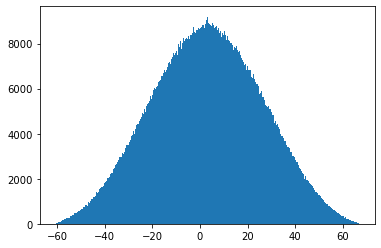

In [12]:
plt.hist(hist_2, bins=500)#, range=(-10,10))
#plt.ylim(ymax = 10000, ymin = 0)
plt.show()

In [13]:
print(np.median(hist_2))
print(1/np.sqrt(len(hist_2)))
print(len(hist_2))

3.0118623971939087
0.0006952642169473248
2068713


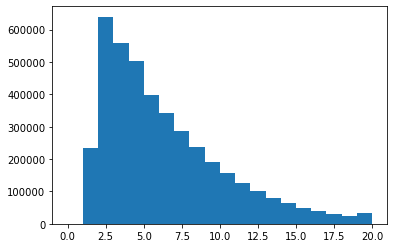

In [14]:
plt.hist(hist_3, bins=20, range=(0,20))
#plt.ylim(ymax = 2100, ymin = 0)
plt.show()

In [6]:
options={
    "ttree_loc": "alignment/mu3e",
    "mc_primary": True,
    "tof": False
}

hist = melp.taft.station_station_timing("../../Downloads/mu3e_sorted_000002_cosmic.root", mu3e_detector, **options)

KeyboardInterrupt: 

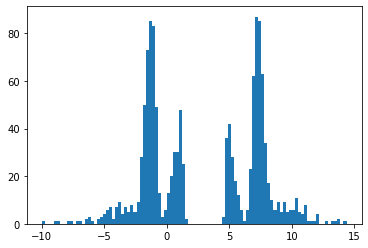

In [16]:
plt.hist(hist, bins=100)#, range=(-10,10))
#plt.ylim(ymax = 10000, ymin = 0)
plt.show()

In [6]:
options_cal = {
    "debug_station": 1,
    "tof": "advanced_new",
    "dt_mode": "median", # median
    "overwrite": True,
    #"hist_file": "histo_2mio_frames_2.root"  # histogram file
    "hist_file": "/run/media/maximilian/Volume/merged.root"
}

In [7]:
melp.taft.calibrate(**options_cal)

Using  median
Calculating absolute timing offsets to master tile: 200000
Calculating absolute timing offsets to master tile: 300000
Calibration finished
Elapsed time: 32.7390 seconds


/home/maximilian/Github/melp/melp/taft/calibrate.py:438: UserWarning: Warning: deprecated
  warnings.warn("Warning: deprecated")
/home/maximilian/Github/melp/melp/taft/calibrate.py:374: UserWarning: Warning: deprecated
  warnings.warn("Warning: deprecated")


([array([-0.00504542]),
  array([-0.00423102]),
  array([-0.00472045]),
  array([-0.00407656]),
  array([-0.0045538]),
  array([-0.00412916]),
  array([-0.00372326]),
  array([-0.00399349]),
  array([-0.00386867]),
  array([-0.00379991]),
  array([-0.00382708]),
  array([-0.00335057]),
  array([-0.00409694]),
  array([-0.00400424]),
  array([-0.00402634]),
  array([-0.00409944]),
  array([-0.00397956]),
  array([-0.00406804]),
  array([-0.00451088]),
  array([-0.00485052]),
  array([-0.00502436]),
  array([-0.0048467]),
  array([-0.00476843]),
  array([-0.00433133]),
  array([-0.00535424]),
  array([-0.00576372]),
  array([-0.00535183]),
  array([-0.00528734]),
  array([-0.0050746]),
  array([-0.00525721]),
  array([-0.00503886]),
  array([-0.00419798]),
  array([-0.00448261]),
  array([-0.00382217]),
  array([-0.00331586]),
  array([-0.00328976]),
  array([-0.00357588]),
  array([-0.00318408]),
  array([-0.0026934]),
  array([-0.00299039]),
  array([-0.00367296]),
  array([-0.0037802]

In [28]:
options={
    "ttree_loc": "alignment/mu3e",
    "mc_primary": True,
    "tof": False,
    "station": 2
}


hist_z = melp.taft.cosmic_tof_correction("/run/media/maximilian/Volume/mu3e_sorted_000002_cosmic.root", mu3e_detector, **options)

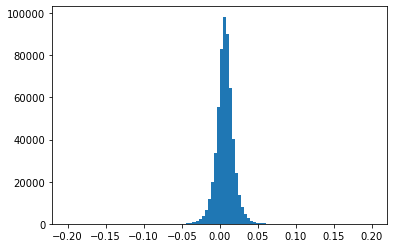

In [29]:
plt.hist(hist_z, bins=100, range=(-0.2,0.2))
plt.show()

In [42]:
print(np.mean(hist_z))

0.006627923710624855


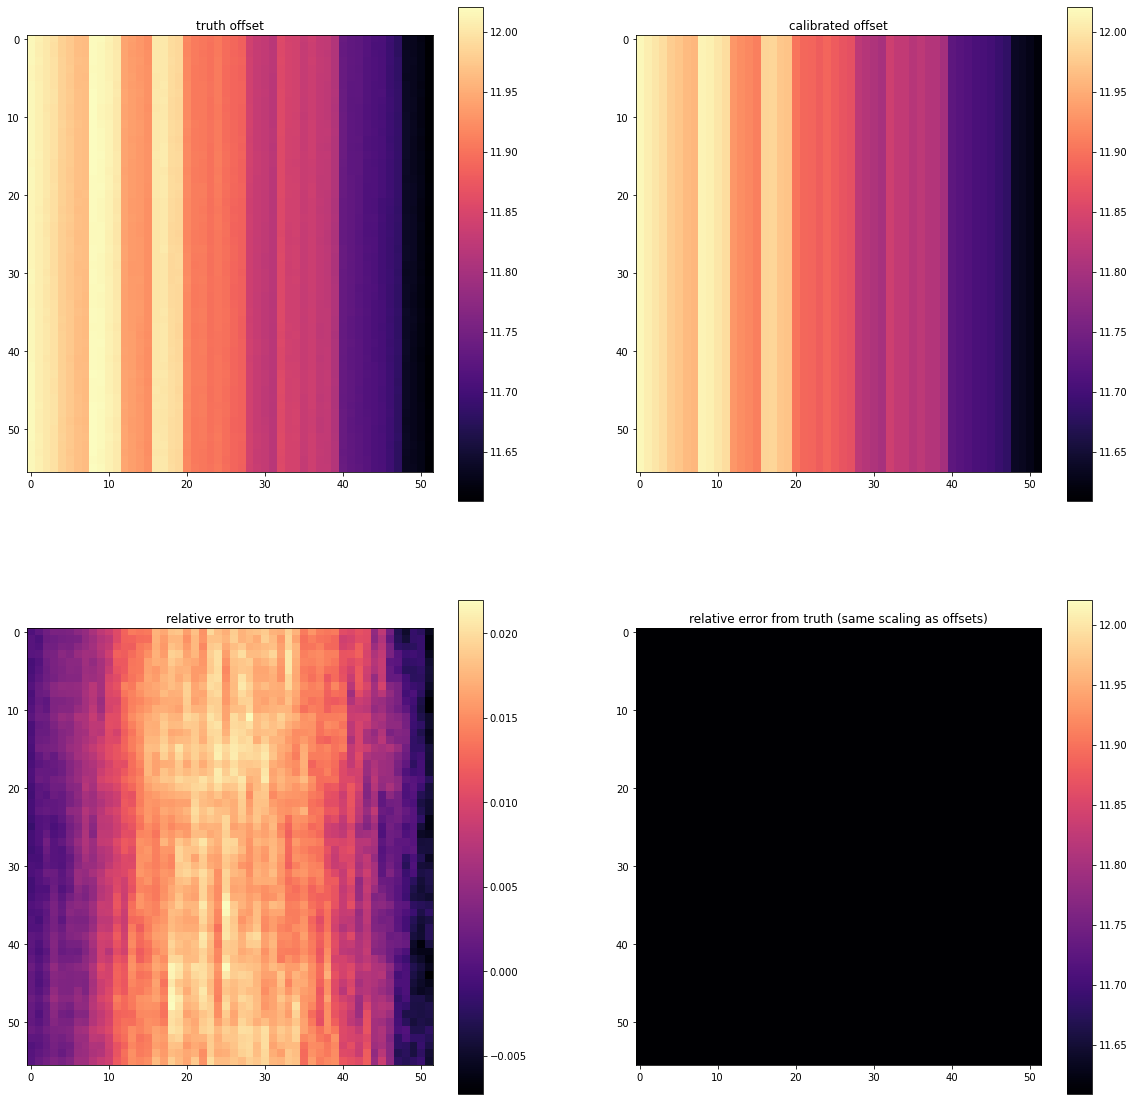

In [11]:
melp.taft.plot_station_calibration(mu3e_detector, 2)

In [14]:
#mu3e_detector.save("test.det")

In [7]:
phi = mu3e_detector.TileDetector.column_ids(0, 300000)

In [8]:
for p in range(len(phi)):
    corr = []
    row = mu3e_detector.TileDetector.row_ids(p, 200000)
    for i in range(len(row)):
        corr.append(-0.0007999 * i)
    for i in range(len(row)):
        mu3e_detector.TileDetector.tile[row[i]].dt_cal -= corr[i]
        
for p in range(len(phi)):
    corr = []
    row = mu3e_detector.TileDetector.row_ids(p, 300000)
    for i in range(len(row)):
        corr.append(0.00662792 * i)
    for i in range(len(row)):
        mu3e_detector.TileDetector.tile[row[i]].dt_cal -= corr[i]

In [18]:
print(range(len(phi)))

range(0, 56)
